<a href="https://colab.research.google.com/github/HabibaAbdelaziz/Personal-Projects/blob/main/Gold_Prices_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data Collection and Processing

In [4]:
# loading the csv data as a Pandas DataFrame
gold_data = pd.read_csv('/content/gld_price_data.csv')

In [5]:
gold_data.head(5)

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [6]:
gold_data.tail(5)

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [7]:
# num of rows and columns
gold_data.shape

(2290, 6)

In [10]:
# get basic information about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [11]:
# check if there are empty columns
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [14]:
# get the statistical measure of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation:

In [15]:
correlation = gold_data.corr()

<ipython-input-15-b9d572e5c3ef>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = gold_data.corr()


<Axes: >

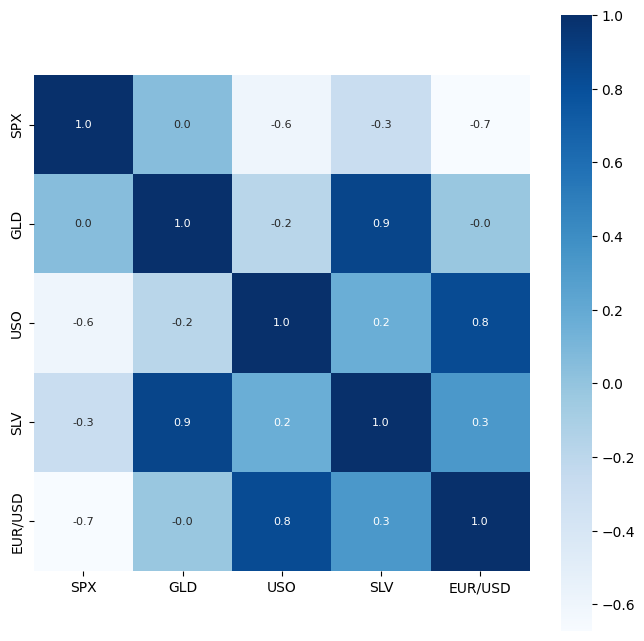

In [16]:
# constructing a heatmap to understand the correlation
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [17]:
# correlation value of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


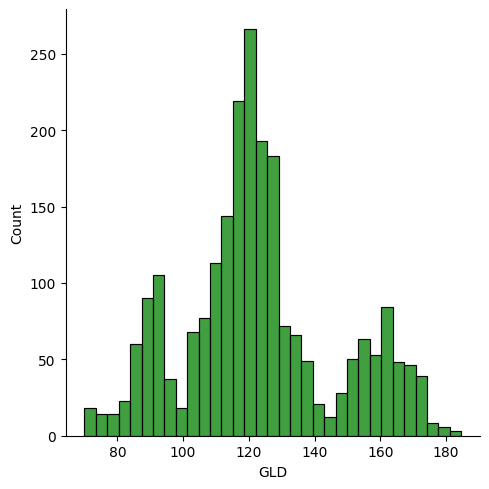

In [18]:
# check distribution of the GLD price
sns.displot(gold_data['GLD'], color='green')

Splitting the Features and Target

In [20]:
X = gold_data.drop(['Date', 'GLD'], axis=1) # make a copy of gold_data, then drop Date and GLD and assign to X
Y = gold_data['GLD'] # assign column GLD to Y

In [21]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [22]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting into Test Data and Train Data

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2) # test_size means take 20% of the data and use it for testing. The other 80% will be used for training.

Model Training:
Random Forest Regressor

In [25]:
regressor = RandomForestRegressor(n_estimators=100)

In [26]:
# train the model
regressor.fit(X_train, Y_train)

RandomForestRegressor()

Model Evaluation

In [28]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)
print(test_data_prediction)

[168.63799976  81.76089997 116.05030018 127.65630069 120.76150158
 154.78909838 149.96379802 126.1745001  117.49849876 125.94870094
 116.66960074 172.51350066 141.84129842 167.75489835 115.05340011
 117.5268004  138.69910278 170.20920054 159.42910286 159.86979939
 155.20040014 125.47610008 175.73779931 156.9072031  125.17450046
  93.71589975  77.44950025 120.6893997  119.17139975 167.50949968
  88.28630034 125.5532004   91.08860053 117.75140003 121.14029897
 136.23740083 115.51690109 114.94330086 147.31259902 107.41260063
 104.68730252  87.18649775 126.54499991 118.06759966 154.58849883
 119.59410043 108.40359958 108.07759862  93.19440012 127.02739797
  75.07360008 113.6034989  121.19840016 111.3279992  118.89599902
 120.5005994  158.92250054 166.90710157 147.26189694  85.56479846
  94.45890051  86.79519875  90.27710025 119.03100068 126.53140054
 127.5290999  169.4649     122.20859916 117.38219872  98.49920053
 168.07380101 142.75809865 132.28020261 121.20650246 121.18349954
 119.43720

In [29]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9895761720052139


Compare the Actual Values and the Predictied Values in a Graph

In [31]:
Y_test = list(Y_test)

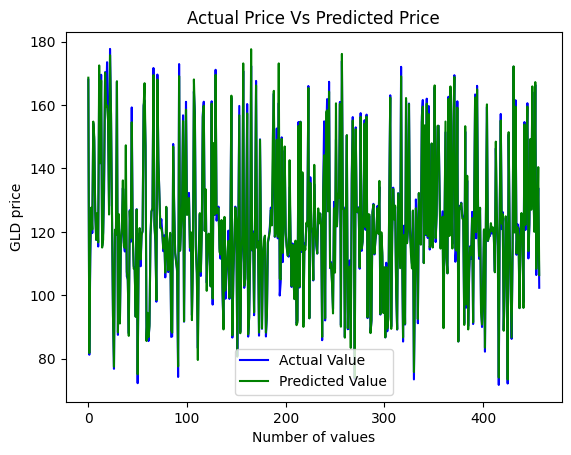

In [33]:
plt.plot(Y_test, color='blue',  label = 'Actual Value')
plt.plot(test_data_prediction, color='green',  label = 'Predicted Value')
plt.title('Actual Price Vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD price')
plt.legend()
plt.show()